# Validating 475K dataset

In [1]:
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import os, glob
from os import listdir
from os.path import isfile, join
import numpy as np
import csv
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras import datasets, layers, models

In [2]:
PROJECT_ROOT_DIR = "."
dir_path = os.path.join(PROJECT_ROOT_DIR, "datasets", 'printed_alphabets')
os.chdir(dir_path)

In [3]:
print(dir_path)

.\datasets\printed_alphabets


In [5]:
def plot_image(img, x=5, y=5):
    plt.figure(figsize=(20,20))
    plt.subplot(x,y,1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.show()

In [6]:
def plot_image_graph_from_array1(image_array, label):
    plt.figure(figsize=(20,20))
    plt.subplot(10,10,1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = Image.fromarray(image_array.astype('uint8'))
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel(label)
    plt.show()
    img.close()

In [7]:
base_folder = os.getcwd()
dirs = os.listdir()

### Load all images and create label dataset

In [8]:
count = len(dirs)
folder_paths = []
dir_files = []

image_list = []
format_list = []
label_list = []
im_array_list = []
im_float_list = []

for index in range(count):
    if not dirs[index].isnumeric():
        continue
    print('Folder: ' + dirs[index])
    path = os.path.join(base_folder, dirs[index])
    if os.path.isdir(path):
        folder_paths.append(path)
        for filename in glob.glob(path + '/*.png'):
            name_parts = filename.split('-')
            file_format = name_parts[1].split('.')
            if not ('n' == file_format[0] or 'b' == file_format[0]):
                continue
            else:
                im = Image.open(filename).convert('1')
                im2 = im.resize((50,50))
                im_array = np.asarray(im2, dtype="int32")
                im_float_array = np.divide(im_array, 255.)
                im_float_list.append(im_float_array)
                format_list.append(file_format)
                label_list.append(int(dirs[index]))
                image_list.append(im_array)
                im.close()
    index += 1

Folder: 1
Folder: 10
Folder: 11
Folder: 12
Folder: 13
Folder: 14
Folder: 15
Folder: 16
Folder: 17
Folder: 18
Folder: 19
Folder: 2
Folder: 20
Folder: 21
Folder: 22
Folder: 23
Folder: 24
Folder: 25
Folder: 26
Folder: 27
Folder: 28
Folder: 29
Folder: 3
Folder: 30
Folder: 31
Folder: 32
Folder: 33
Folder: 34
Folder: 35
Folder: 36
Folder: 37
Folder: 38
Folder: 39
Folder: 4
Folder: 40
Folder: 41
Folder: 42
Folder: 43
Folder: 44
Folder: 45
Folder: 46
Folder: 47
Folder: 48
Folder: 49
Folder: 5
Folder: 50
Folder: 51
Folder: 52
Folder: 53
Folder: 54
Folder: 55
Folder: 56
Folder: 57
Folder: 58
Folder: 59
Folder: 6
Folder: 60
Folder: 61
Folder: 62
Folder: 63
Folder: 64
Folder: 65
Folder: 66
Folder: 67
Folder: 68
Folder: 69
Folder: 7
Folder: 70
Folder: 71
Folder: 72
Folder: 73
Folder: 74
Folder: 75
Folder: 76
Folder: 77
Folder: 78
Folder: 79
Folder: 8
Folder: 80
Folder: 81
Folder: 82
Folder: 83
Folder: 84
Folder: 85
Folder: 86
Folder: 87
Folder: 88
Folder: 89
Folder: 9
Folder: 90
Folder: 91
Folder: 

Check lenghts of folder_paths, image_list, format_list and label_list

In [9]:
print('len: ' + str(len(folder_paths)))
print('image_list: ' + str(len(image_list)))
print('format_list: ' + str(len(format_list)))
print('label_list: ' + str(len(label_list)))
print('im_float_list: ' + str(len(im_float_list)))

len: 94
image_list: 76516
format_list: 76516
label_list: 76516
im_float_list: 76516


Check few images with their labels

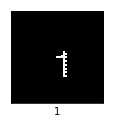

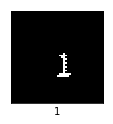

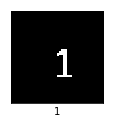

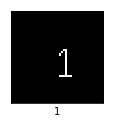

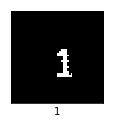

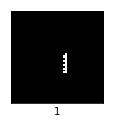

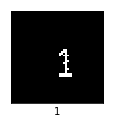

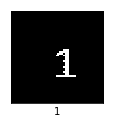

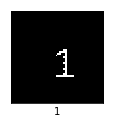

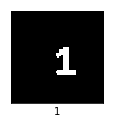

In [10]:
i = 1
for i in range(10):
    plot_image_graph_from_array1(image_list[i], label_list[i])


In [11]:
X = im_float_list
y = label_list
X, y = shuffle(X, y, random_state=0)
print(y[0:15])

[68, 88, 53, 49, 31, 40, 89, 29, 9, 34, 62, 20, 52, 90, 11]


In [12]:
print(X[0])
print(X[0].shape)

[[0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 ...
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]]
(50, 50)


In [13]:
X3 = np.asarray(X)
print(X3.shape)

(76516, 50, 50)


In [14]:
X3[0]

array([[0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       ...,
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157]])

In [15]:
train_len = int(len(X3)*.8)
print('train_len: ' + str(train_len))

train_len: 61212


In [16]:
train_image, test_image, train_label, test_label = X3[:train_len], X3[train_len:], y[:train_len], y[train_len:]

In [17]:
print('train_image.shape: ' + str(train_image.shape))
print('train_label.shape: ' + str(len(train_label)))
print('test_image.shape: ' + str(test_image.shape))
print('test_label.shape: ' + str(len(test_label)))

train_image.shape: (61212, 50, 50)
train_label.shape: 61212
test_image.shape: (15304, 50, 50)
test_label.shape: 15304


In [18]:
X_train = train_image[..., tf.newaxis]
X_test = test_image[..., tf.newaxis]

In [19]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, train_label)).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, test_label)).batch(32)

In [20]:
tf.keras.backend.set_floatx('float64')
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(50, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(95, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

In [21]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [22]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [23]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [24]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [26]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

Epoch 1, Loss: 4.545048355993898, Accuracy: 0.8740116317062014, Test Loss: 4.545013024563082, Test Accuracy: 0.9474647151071615
Epoch 2, Loss: 4.544650426785857, Accuracy: 0.9638632947788016, Test Loss: 4.5448204161976475, Test Accuracy: 0.9474647151071615
Epoch 3, Loss: 4.544393670290973, Accuracy: 0.9164869633405215, Test Loss: 4.544587471788761, Test Accuracy: 0.9474647151071615
Epoch 4, Loss: 4.5442432395089565, Accuracy: 0.9377246291576815, Test Loss: 4.544345314169228, Test Accuracy: 0.9474647151071615
Epoch 5, Loss: 4.544038767348518, Accuracy: 0.9736652943867216, Test Loss: 4.5444159577435395, Test Accuracy: 0.9474647151071615
